In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [16]:
image = cv2.imread("/content/01448_depth.png", cv2.IMREAD_GRAYSCALE)

0.25


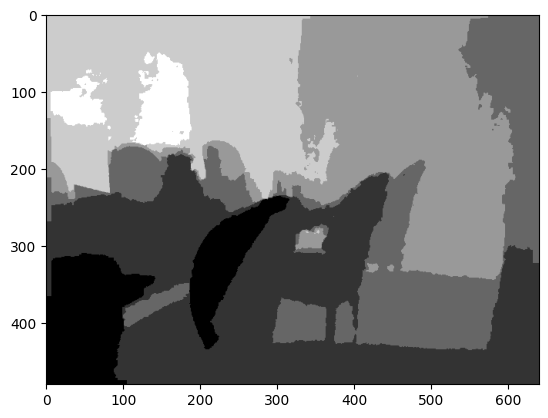

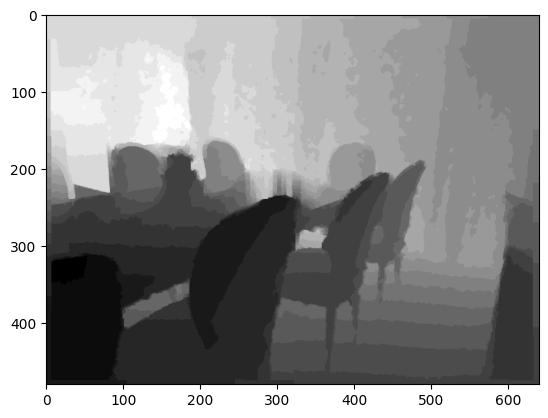

In [48]:
# applying quantization
a = 6
quantization_factor = 2 ** a / 256
print(quantization_factor)
image_quantized = np.ceil(image * quantization_factor)
plt.imshow(image_quantized, cmap='gray')
plt.show()
plt.imshow(image, cmap='gray')
plt.show()

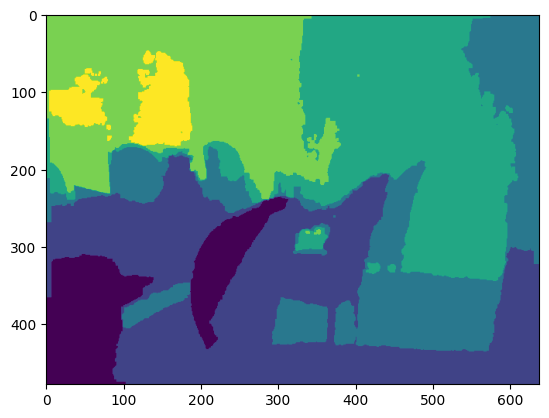

In [47]:
# applying max pooling on the quantized image
POOL_SIZE = 3
STRIDE = 1

H, W = image_quantized.shape
new_H = (H - POOL_SIZE) // STRIDE + 1
new_W = (W - POOL_SIZE) // STRIDE + 1

image_pooled = np.zeros((new_H, new_W), dtype=image_quantized.dtype)

for i in range(0, H - POOL_SIZE + 1, STRIDE):
    for j in range(0, W - POOL_SIZE + 1, STRIDE):
        window = image_quantized[i : i + POOL_SIZE, j : j + POOL_SIZE]
        image_pooled[i // STRIDE, j // STRIDE] = np.max(window)

plt.imshow(image_pooled_normalized, cmap='viridis')
plt.show()

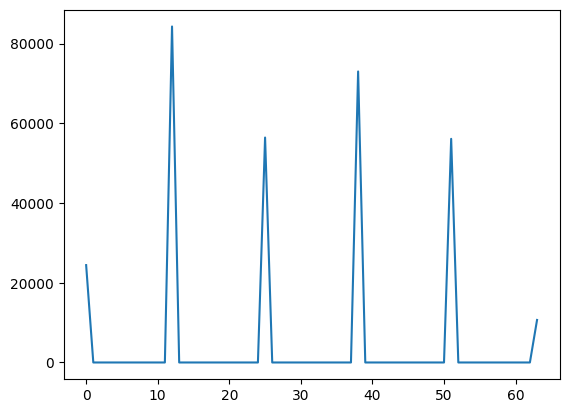

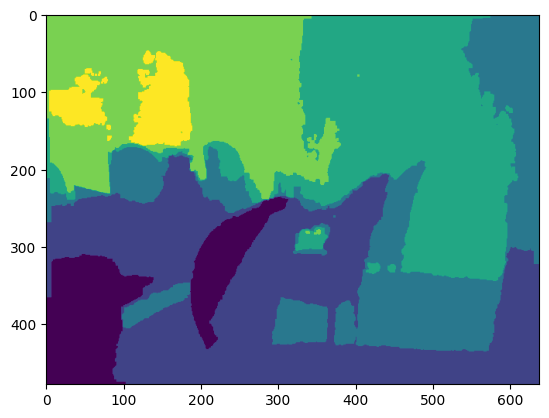

In [53]:
# calculate histogram of the image
image_pooled_normalized = cv2.normalize(image_pooled, None, alpha=0, beta=2 ** a, norm_type=cv2.NORM_MINMAX)
hist, bins = np.histogram(image_pooled_normalized.flatten(), 2 ** a, [0, 2 ** a])
plt.plot(hist)
plt.show()
plt.imshow(image_pooled_normalized, cmap='viridis')